In [0]:

!pip install spacy
!python -m spacy download en_core_web_sm
!pip install wordcloud
!pip install matplotlib

import nltk
from nltk.corpus import movie_reviews
import pandas as pd
import re
import html
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('movie_reviews')



Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 8.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


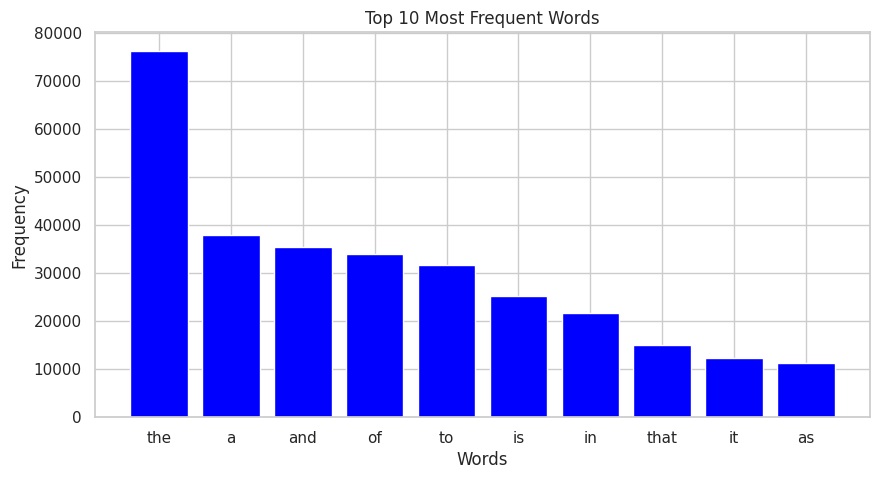

In [0]:
import nltk
from nltk.corpus import movie_reviews
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('movie_reviews')


documents = [(movie_reviews.raw(fileid), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]
df = pd.DataFrame(documents, columns=['Review Text', 'Category'])


def clean_text(text):
    if not isinstance(text, str):
        return ''
    
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    return text

df['clean_text'] = df['Review Text'].apply(clean_text)

def regex_tokenize(text):
    return re.findall(r'\b\w+\b', text)

df['tokens'] = df['clean_text'].apply(regex_tokenize)


all_tokens = [token for sublist in df['tokens'] for token in sublist]
word_counts = Counter(all_tokens)

top_words = word_counts.most_common(10)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])


plt.figure(figsize=(10, 5))
plt.bar(top_words_df['Word'], top_words_df['Frequency'], color='blue')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [0]:
df.head(10)

,Review Text,Category,clean_text,tokens
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couples go to a church party d...,"[plot, two, teen, couples, go, to, a, church, ..."
1,the happy bastard's quick movie review \ndamn ...,neg,the happy bastards quick movie review \ndamn t...,"[the, happy, bastards, quick, movie, review, d..."
2,it is movies like these that make a jaded movi...,neg,it is movies like these that make a jaded movi...,"[it, is, movies, like, these, that, make, a, j..."
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest for camelot is warner bros first fe...,"[quest, for, camelot, is, warner, bros, first,..."
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis a mentally unstable man undergoing p...,"[synopsis, a, mentally, unstable, man, undergo..."
5,capsule : in 2176 on the planet mars police ta...,neg,capsule in 2176 on the planet mars police tak...,"[capsule, in, 2176, on, the, planet, mars, pol..."
6,"so ask yourself what "" 8mm "" ( "" eight millime...",neg,so ask yourself what 8mm eight millimeter ...,"[so, ask, yourself, what, 8mm, eight, millimet..."
7,that's exactly how long the movie felt to me ....,neg,thats exactly how long the movie felt to me \...,"[thats, exactly, how, long, the, movie, felt, ..."
8,call it a road trip for the walking wounded . ...,neg,call it a road trip for the walking wounded \...,"[call, it, a, road, trip, for, the, walking, w..."
9,plot : a young french boy sees his parents kil...,neg,plot a young french boy sees his parents kill...,"[plot, a, young, french, boy, sees, his, paren..."


In [0]:

print(df.head())

print(df.info())

print(df.describe())


                                         Review Text  ...                                             tokens
0  plot : two teen couples go to a church party ,...  ...  [plot, two, teen, couples, go, to, a, church, ...
1  the happy bastard's quick movie review \ndamn ...  ...  [the, happy, bastards, quick, movie, review, d...
2  it is movies like these that make a jaded movi...  ...  [it, is, movies, like, these, that, make, a, j...
3   " quest for camelot " is warner bros . ' firs...  ...  [quest, for, camelot, is, warner, bros, first,...
4  synopsis : a mentally unstable man undergoing ...  ...  [synopsis, a, mentally, unstable, man, undergo...

[5 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  2000 non-null   object
 1   Category     2000 non-null   object
 2   clean_text   2000 non-null   object
 3   tokens  

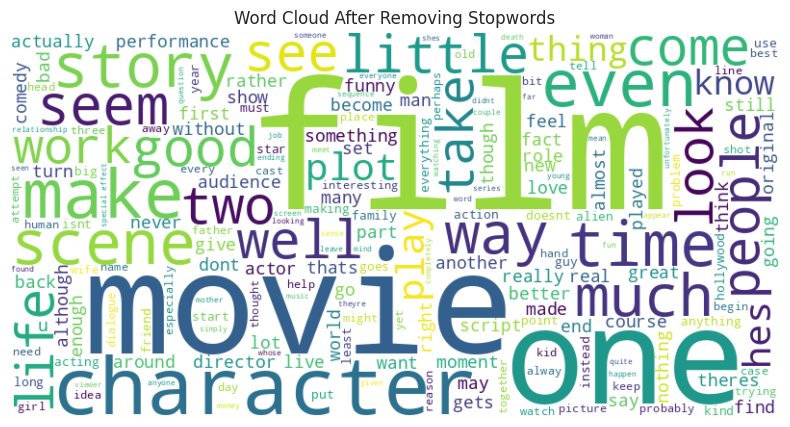

In [0]:

all_tokens_no_stopwords = [word for tokens in df['tokens_no_stopwords'] for word in tokens]

word_freq = Counter(all_tokens_no_stopwords)

top_words = word_freq.most_common(10)

top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

fig = px.bar(top_words_df, 
             x='Word', 
             y='Frequency', 
             title="Top 10 Words After Removing Stopwords", 
             labels={'Word': 'Words', 'Frequency': 'Frequency'}, 
             color='Frequency', 
             color_continuous_scale='Blues')

fig.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_tokens_no_stopwords))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title("Word Cloud After Removing Stopwords")
plt.show()


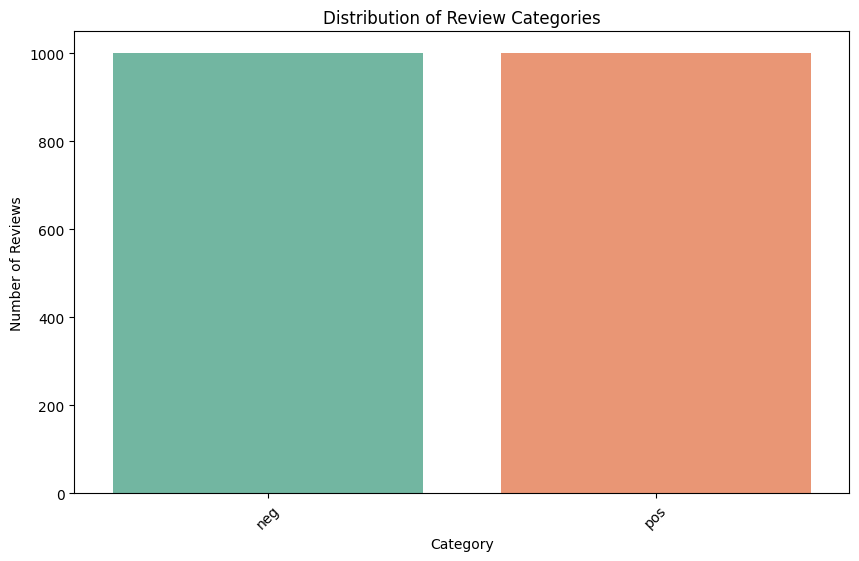

In [0]:
# number of reviews per category
category_counts = df['Category'].value_counts()

# category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, order=category_counts.index, palette='Set2')
plt.title('Distribution of Review Categories')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


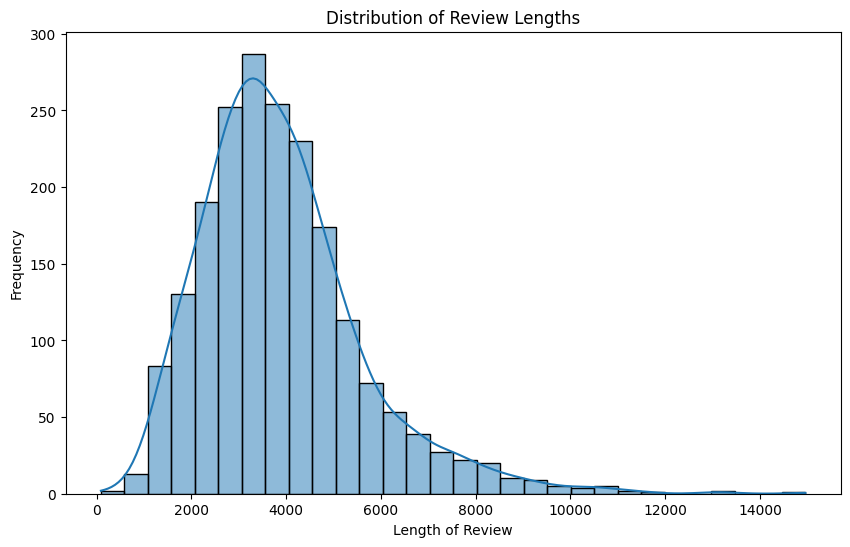

In [0]:
# length of each review
df['review_length'] = df['Review Text'].apply(len)

# distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


In [0]:
def clean_text(text):
    if not isinstance(text, str):
        return ''

    # URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # HTML tags
    text = re.sub(r'<.*?>', '', text)

    # brackets 
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\{.*?\}', '', text)

    # punctuation
    text = re.sub(r'[!"\'#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text)

    # non-ASCII characters
    text = ''.join(char for char in text if ord(char) < 128)

    text = text.lower()

    return text


df['clean_text'] = df['Review Text'].apply(clean_text)
def tokenize_with_spacy(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

df['tokens'] = df['clean_text'].apply(tokenize_with_spacy)



In [0]:

from sklearn.decomposition import LatentDirichletAllocation

# 1: Preprocessing 
df['clean_text_topics'] = df['clean_text'].fillna('')

# 2: Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['clean_text_topics'])

# 3: LDA Model
n_topics = 10  
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X)

# 4: Display 
def print_topics(model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_words = [words[i] for i in topic.argsort()[-n_words:]]
        print(f"Topic {idx + 1}: {', '.join(topic_words)}")

print_topics(lda_model, vectorizer)


Topic 1: life, characters, character, time, story, good, just, like, movie, film
Topic 2: perfect, reality, detective, godzilla, peter, concept, television, jim, carrey, truman
Topic 3: vampire, carter, chan, trek, simon, joe, film, harry, carrey, truman
Topic 4: vampire, carter, chan, trek, simon, joe, film, harry, carrey, truman
Topic 5: vampire, carter, chan, trek, simon, joe, film, harry, carrey, truman
Topic 6: film, going, words, waste, hong, brown, tarantino, godzilla, chan, jackie
Topic 7: vampire, carter, chan, trek, simon, joe, film, harry, carrey, truman
Topic 8: vampire, carter, chan, trek, simon, joe, film, harry, carrey, truman
Topic 9: basic, voice, city, adventure, songs, animated, lost, animation, disney, tarzan
Topic 10: vampire, carter, chan, trek, simon, joe, film, harry, carrey, truman


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f740b38ea70>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

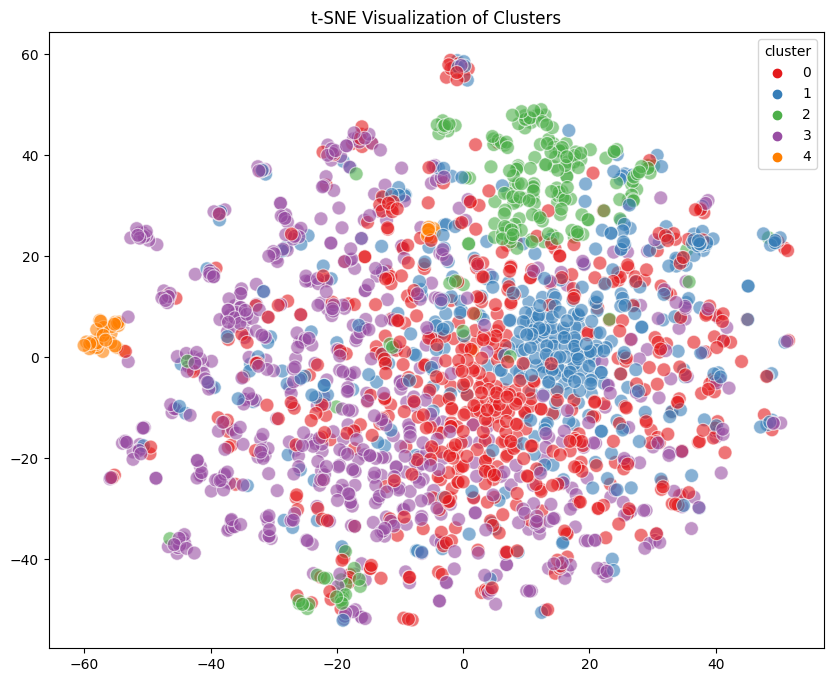

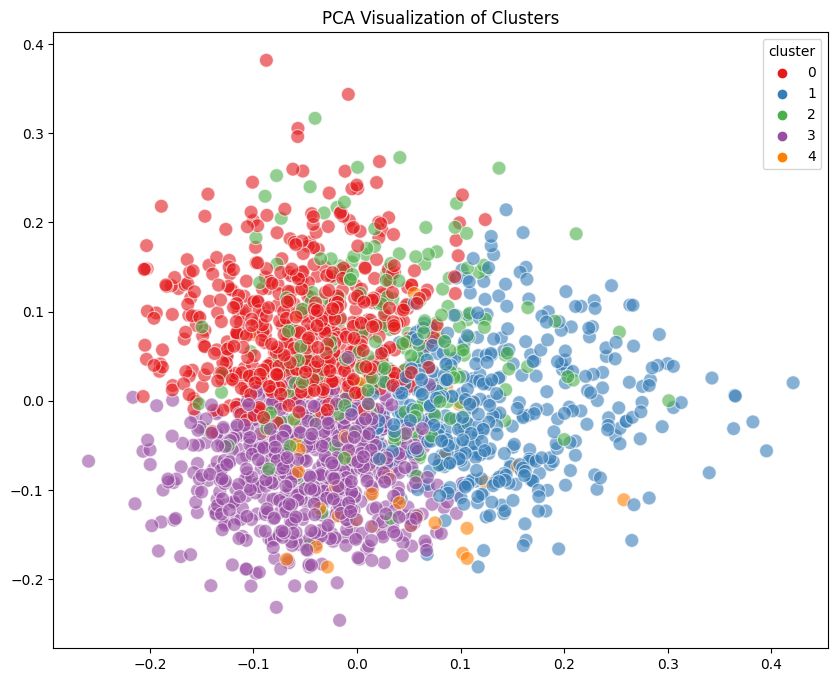

In [0]:
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['clean_text'])

n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())


plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['cluster'], palette='Set1', s=100, alpha=0.6)
plt.title("t-SNE Visualization of Clusters")
plt.show()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set1', s=100, alpha=0.6)
plt.title("PCA Visualization of Clusters")
plt.show()


In [0]:

terms = vectorizer.get_feature_names_out()

n_top_words = 10  
order_centroids = kmeans.cluster_centers_.argsort()  

for cluster_num in range(n_clusters):
    print(f"\nCluster {cluster_num} Keywords:")
    top_terms = [terms[i] for i in order_centroids[cluster_num, ::-1][:n_top_words]]
    print(", ".join(top_terms))



Cluster 0 Keywords:
film, like, just, story, good, character, movie, characters, time, films

Cluster 1 Keywords:
movie, film, like, bad, just, good, movies, time, really, know

Cluster 2 Keywords:
film, alien, movie, effects, ship, planet, aliens, earth, star, mars

Cluster 3 Keywords:
film, movie, life, like, story, love, comedy, family, time, just

Cluster 4 Keywords:
jackie, chan, batman, film, hong, tarantino, fight, movie, action, brown


In [0]:
n_top_words = 20  
components = pca.components_

for component_num, component in enumerate(components):
    print(f"\nPCA Component {component_num} Keywords:")
    top_terms_idx = component.argsort()[-n_top_words:][::-1]
    top_terms = [terms[i] for i in top_terms_idx]
    print(", ".join(top_terms))



PCA Component 0 Keywords:
movie, bad, movies, just, good, know, action, guy, really, funny, plot, effects, like, don, did, thing, ve, stupid, didn, got

PCA Component 1 Keywords:
film, alien, effects, films, really, just, horror, bad, action, character, special, characters, scenes, plot, good, aliens, planet, actually, like, earth


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

         neg       0.78      0.80      0.79       199
         pos       0.80      0.78      0.79       201

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



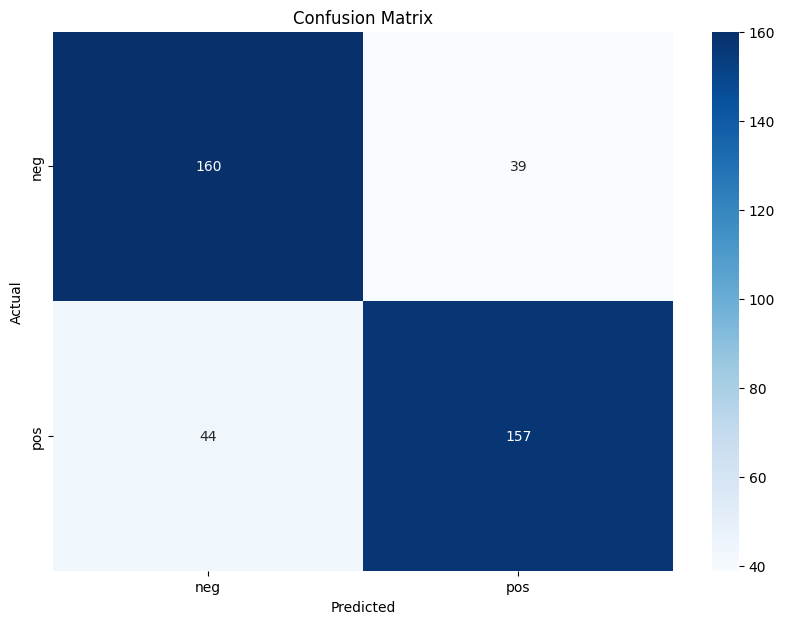

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Category'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [0]:
!pip install textblob
from textblob import TextBlob
import pandas as pd

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)

print(df['sentiment'].value_counts())


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
positive    1746
negative     254
Name: sentiment, dtype: int64


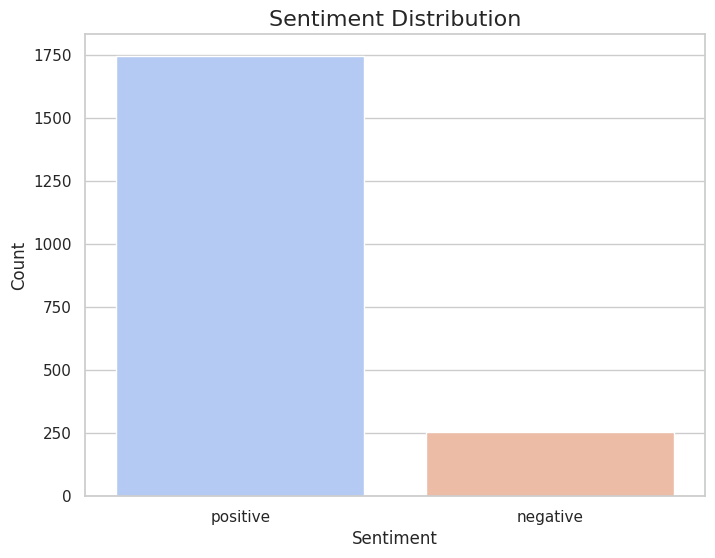

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')

# Add title and labels
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


In [0]:
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
df['subjectivity'] = df['clean_text'].apply(get_subjectivity)

print(df[['clean_text', 'subjectivity']].head())




                                          clean_text  subjectivity
0  plot  two teen couples go to a church party  d...      0.518841
1  the happy bastards quick movie review \ndamn t...      0.331000
2  it is movies like these that make a jaded movi...      0.501421
3    quest for camelot  is warner bros   first fe...      0.485683
4  synopsis  a mentally unstable man undergoing p...      0.475925


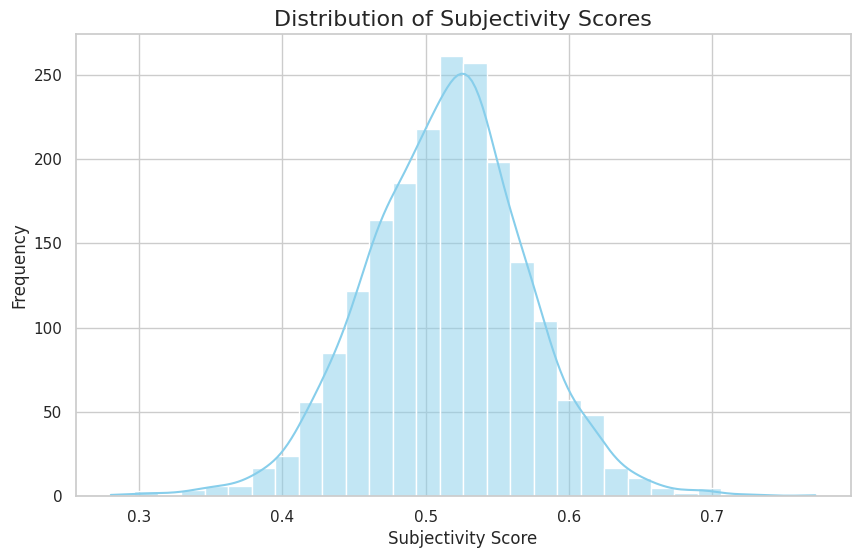

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram of subjectivity scores
plt.figure(figsize=(10, 6))
sns.histplot(df['subjectivity'], bins=30, kde=True, color='skyblue')

# Add title and labels
plt.title('Distribution of Subjectivity Scores', fontsize=16)
plt.xlabel('Subjectivity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()
